* Dates:
    * Older moves might not be torrented
    * Month: Blockbusters are released in May and December, No good movies released January - April, Kids are on summer cvaction during summer months.
* Production Budget: 
    * Might be outliers. Take log if outliers, Remove outliers, Create new feature that is binning production budget
* Rating: Is there a relationship with Number of torrents, look at mean, median torrents per rating. Maybe group ratings together for example G, PG, PG-13 in one group R in another
* Genre as a feature. Maybe keep a subset maybe create new ratings by combing other ratings

In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

# Read in TRAIN data set and select pertinent columns

In [2]:
df = pd.read_csv('data/train_data.csv', encoding='latin-1')
print(len(df))
df.head()

1322


,Title,Prod_Budget,Released,Year,Month,Rated,Runtime,Genre,Director,Actors,Total_Torrents
0,The Siege,70000000.0,1998-11-06,1998.0,11.0,R,116,"Action, Thriller",Edward Zwick,"Denzel Washington, Annette Bening, Bruce Willi...",113.0
1,Boomerang,42000000.0,1992-07-01,1992.0,7.0,R,117,"Comedy, Drama, Romance",Reginald Hudlin,"Eddie Murphy, Robin Givens, Halle Berry, David...",30.0
2,Stepmom,50000000.0,1998-12-25,1998.0,12.0,PG-13,124,"Comedy, Drama",Chris Columbus,"Julia Roberts, Susan Sarandon, Ed Harris, Jena...",36.0
3,Moonraker,31000000.0,1979-06-29,1979.0,6.0,PG,126,"Action, Adventure, Sci-Fi",Lewis Gilbert,"Roger Moore, Lois Chiles, Michael Lonsdale, Ri...",130.0
4,Intolerance,385907.0,1916-09-05,1916.0,9.0,NOT RATED,197,"Drama, History, War",D.W. Griffith,"Lillian Gish, Mae Marsh, Robert Harron, F.A. T...",37.0


# Convert dates to datetime objects

In [3]:
df['Released'] = pd.to_datetime(df['Released'])
df['Year'] = pd.DatetimeIndex(df['Released']).year
df['Month'] = pd.DatetimeIndex(df['Released']).month
df.head()

,Title,Prod_Budget,Released,Year,Month,Rated,Runtime,Genre,Director,Actors,Total_Torrents
0,The Siege,70000000.0,1998-11-06,1998,11,R,116,"Action, Thriller",Edward Zwick,"Denzel Washington, Annette Bening, Bruce Willi...",113.0
1,Boomerang,42000000.0,1992-07-01,1992,7,R,117,"Comedy, Drama, Romance",Reginald Hudlin,"Eddie Murphy, Robin Givens, Halle Berry, David...",30.0
2,Stepmom,50000000.0,1998-12-25,1998,12,PG-13,124,"Comedy, Drama",Chris Columbus,"Julia Roberts, Susan Sarandon, Ed Harris, Jena...",36.0
3,Moonraker,31000000.0,1979-06-29,1979,6,PG,126,"Action, Adventure, Sci-Fi",Lewis Gilbert,"Roger Moore, Lois Chiles, Michael Lonsdale, Ri...",130.0
4,Intolerance,385907.0,1916-09-05,1916,9,NOT RATED,197,"Drama, History, War",D.W. Griffith,"Lillian Gish, Mae Marsh, Robert Harron, F.A. T...",37.0


# Inspect years

In [4]:
df['Year'].describe().astype(int)

count    1322
mean     2003
std        10
min      1916
25%      1999
50%      2005
75%      2011
max      2016
Name: Year, dtype: int64

In [5]:
# dictionary - year counts
yr_dict = df['Year'].value_counts().to_dict()

import operator
yr_lst = sorted(yr_dict.items(), key=operator.itemgetter(0)) # sort by year
yr_lst = yr_lst[::-1]
print(yr_lst)

[(2016, 30), (2015, 67), (2014, 48), (2013, 60), (2012, 63), (2011, 72), (2010, 73), (2009, 60), (2008, 74), (2007, 49), (2006, 62), (2005, 44), (2004, 49), (2003, 64), (2002, 50), (2001, 49), (2000, 51), (1999, 42), (1998, 46), (1997, 26), (1996, 30), (1995, 29), (1994, 12), (1993, 12), (1992, 14), (1991, 9), (1990, 11), (1989, 11), (1988, 9), (1987, 9), (1986, 8), (1985, 13), (1984, 11), (1983, 8), (1982, 3), (1981, 10), (1980, 5), (1979, 6), (1978, 3), (1977, 1), (1976, 3), (1975, 1), (1974, 2), (1973, 2), (1972, 1), (1971, 2), (1970, 2), (1969, 3), (1968, 3), (1967, 2), (1966, 1), (1961, 1), (1960, 1), (1958, 1), (1956, 1), (1953, 1), (1939, 1), (1916, 1)]


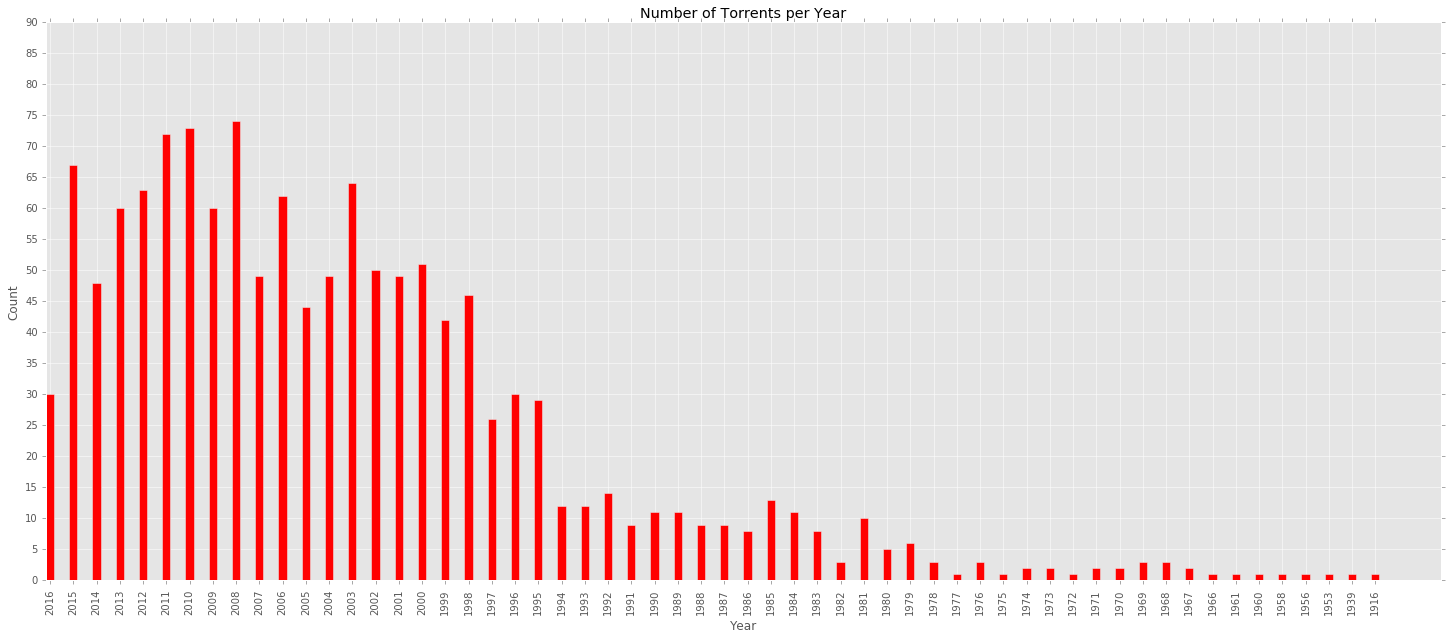

In [6]:
plt.figure(figsize=(25,10))

ind = np.arange(len(yr_dict))
width = 0.35

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of Torrents per Year')
plt.xticks(ind + width/2., (bar_year), rotation='vertical')
plt.yticks(np.arange(0, 91, 5))

plt.show()

# df => df_yr 

In [7]:
# cut off at year 
before = len(df)
yr_cut = 1995
df_yr = df.loc[df['Year'] >= yr_cut]
df_yr.sort_values('Year').head()
after = len(df_yr)

print('{0} entries lost ({1}%) due to date cutoff at {2}'.format(before-after, 
                                                                 round((before/after)/before *100, 2), yr_cut))

184 entries lost (0.09%) due to date cutoff at 1995


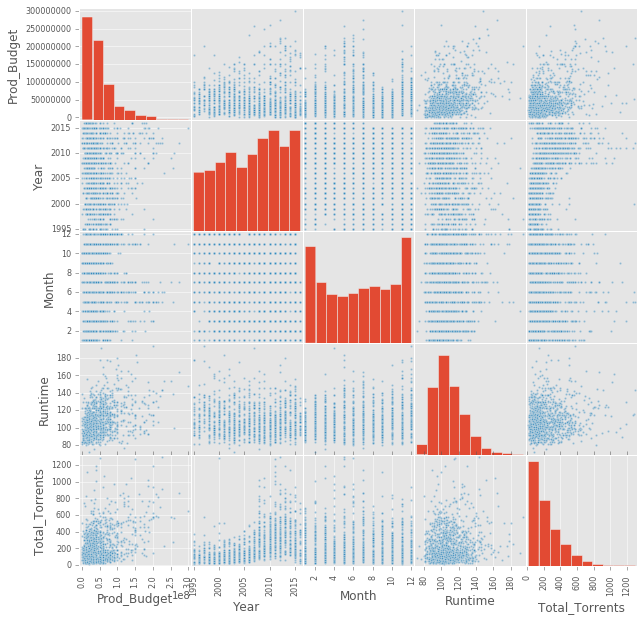

In [8]:
# look at current data set AFTER year cutoff
plt.rcParams['figure.figsize'] = (10, 10)
_ = pd.tools.plotting.scatter_matrix(df_yr)

In [9]:
# unique list of grouped genres as strings
unq_genres = df_yr['Genre'].unique()
unq_genres = unq_genres.tolist()

#print(len(unq_genres))
#print(unq_genres[:10])

# unique list of grouped genres as lists
lst_grp_genres = []
for lst in unq_genres:
    temp = []
    for genre in lst.split(','):
         temp.append(genre)
    lst_grp_genres.append(temp)

#print(len(lst_grp_genres))
#print(lst_grp_genres)

In [10]:
# unique list of individual genres
ind_genre = set()

for lst in unq_genres:
    for genre in lst.split(','):
        ind_genre.add(genre.strip())
ind_genre = sorted(ind_genre)

#print(len(ind_genre))
#print(ind_genre)

In [11]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for genre in ind_genre:
    count[genre] = df_yr.Genre.str.contains(genre).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
#print(srt)

In [12]:
def split_to_array(ser):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    return pd.Series(split_array)

genres = df_yr.Genre.apply(split_to_array)
genres = pd.Series(genres.values.ravel()).dropna()
genres = genres.value_counts().sort_values(ascending=False)

In [13]:
def convert_frequency(ser, genres=genres):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    genre = genres.loc[split_array].argmax()
    return genre

df_yr['Genre_Single'] = df_yr.Genre.apply(convert_frequency)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Select only significant values from dataframe
# df_yr => df_sub

In [14]:
# select only genres of significance
genre = ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama']
df_sub = df_yr.loc[df_yr['Genre_Single'].isin(genre)]

# select only genres of significance
ratings = ['PG-13', 'PG', 'G', 'R']
df_sub = df_sub.loc[df_sub['Rated'].isin(ratings)]

#df_sub['Runtime'].value_counts()
#df_sub['Genre_Single'].value_counts()
#df_sub['Rated'].value_counts()
df_sub.describe()

,Prod_Budget,Year,Month,Runtime,Total_Torrents
count,1.037000e+03,1037.000000,1037.000000,1037.000000,1037.000000
mean,5.469584e+07,2006.374156,6.645130,110.127290,242.530376
std,4.581209e+07,5.838630,3.387663,17.635882,208.044397
min,6.800000e+04,1995.000000,1.000000,72.000000,17.000000
25%,2.400000e+07,2002.000000,4.000000,98.000000,97.000000
50%,4.000000e+07,2007.000000,7.000000,107.000000,173.000000
75%,7.000000e+07,2011.000000,10.000000,119.000000,332.000000
max,3.000000e+08,2016.000000,12.000000,194.000000,1294.000000


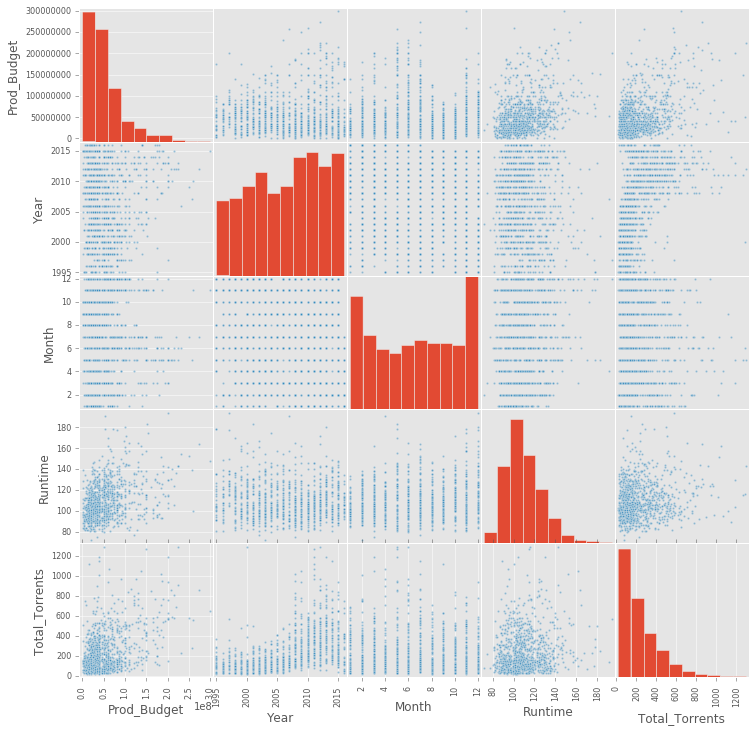

In [15]:
# entire dataframe
plt.rcParams['figure.figsize'] = (12, 12)
_ = pd.tools.plotting.scatter_matrix(df_sub)

In [16]:
from patsy import dmatrices
patsy_formula = 'Total_Torrents ~ Prod_Budget + Year + Month + Runtime + Genre_Single'
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

In [17]:
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     106.6
Date:                Thu, 14 Jul 2016   Prob (F-statistic):          2.89e-129
Time:                        18:40:49   Log-Likelihood:                -6692.9
No. Observations:                1037   AIC:                         1.340e+04
Df Residuals:                    1028   BIC:                         1.345e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                 -3.456e+04   1678.416    -20.592      0.000     -3.79e+04 -3.13e+04
Genre_Single[T.Adventure]  -141.4079     33.129     -4.268      0.000      -206.415   -76.401
Genre_Single[T.Comedy]      -99.4410     14.710     -6.760      0.000      -128.306   -70.576
Genre_Single[T.Crime]       -87.4451     38.423     -2.276      0.023      -162.841   -12.050
Genre_Single[T.Drama]       -93.0043     14.625     -6.359      0.000      -121.702   -64.307
Prod_Budget                1.498e-06   1.27e-07     11.830      0.000      1.25e-06  1.75e-06
Year                         17.3172      0.835     20.745      0.000        15.679    18.955
Month                        -1.3305      1.438     -0.925      0.355        -4.152     1.491
Runtime                       0.6030      0.328      1.836      0.067        -0.042     1.248
==============================================================================
Omnibus:                      440.093   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3248.892
Skew:                           1.779   Prob(JB):                         0.00
Kurtosis:                      10.908   Cond. No.                     2.50e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
mod_lr_score = model.score(x, y)
mod_lr_coef = model.coef_

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [19]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
cv_mod_score = model.score(x_train, y_train)

In [20]:
# reset x, y otherwise errors occur
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
cvKf_mod_score = clf2.score(x,y)

In [21]:
#NORMAL RESULTS
print('Model Linear Regression Score = {0}'.format(mod_lr_score))
print('            Mean Square Error = {0}'.format(mean_sq_err))
print(' Cross Validation Model Score = {0}'.format(cv_mod_score))
print('     Mean Squred Error K-Fold = {0}'.format(mean_sq_errKf))
print('Cross Val. K-Fold Model Score = {0}'.format(cvKf_mod_score))

Model Linear Regression Score = 0.4534841100360436
            Mean Square Error = 24628.411201443338
 Cross Validation Model Score = 0.4307658500446161
     Mean Squred Error K-Fold = 24548.30603305319
Cross Val. K-Fold Model Score = 0.45301440962010536


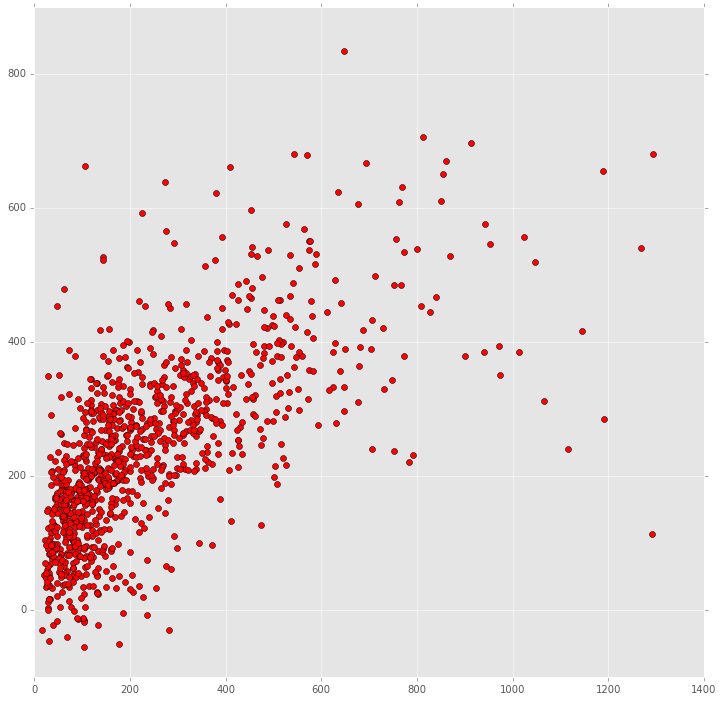

In [22]:
_ = plt.plot(y, model.predict(x), 'ro')

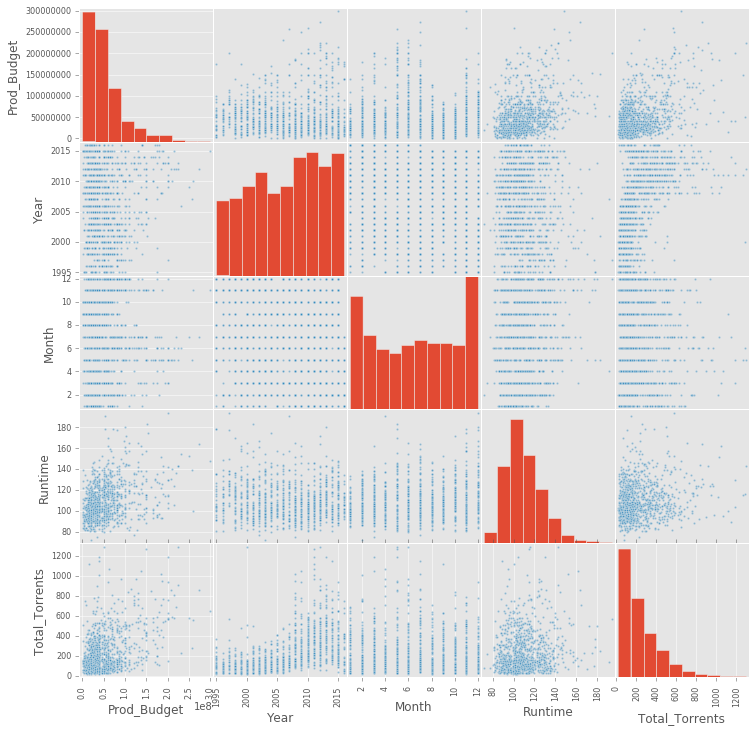

In [23]:
# entire dataframe
plt.rcParams['figure.figsize'] = (12, 12)
_ = pd.tools.plotting.scatter_matrix(df_sub)

---
# Log Transform

In [24]:
df.columns

Index(['Title', 'Prod_Budget', 'Released', 'Year', 'Month', 'Rated', 'Runtime',
       'Genre', 'Director', 'Actors', 'Total_Torrents'],
      dtype='object')

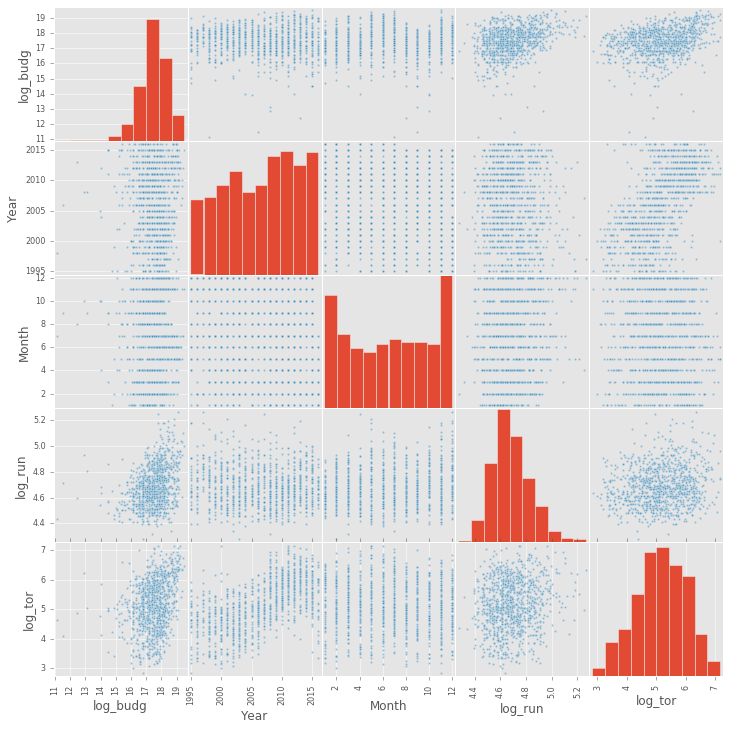

In [25]:
df_sub['log_budg']=np.log(df_sub.Prod_Budget)
#df_sub['log_year']=np.log(df_sub.Year)
df_sub['log_run']=np.log(df_sub.Runtime)
df_sub['log_tor']=np.log(df_sub.Total_Torrents)

trans = df_sub[['log_budg', 'Year', 'Month', 'log_run', 'log_tor']]
_ = pd.tools.plotting.scatter_matrix(trans)

In [26]:
log_patsy_formula = 'log_tor ~ log_budg + Year + Month + log_run + Genre_Single'
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

In [27]:
import statsmodels.formula.api as smf
results = smf.ols(formula=log_patsy_formula, data=df_sub,).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tor   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     122.5
Date:                Thu, 14 Jul 2016   Prob (F-statistic):          1.03e-143
Time:                        18:40:55   Log-Likelihood:                -965.90
No. Observations:                1037   AIC:                             1950.
Df Residuals:                    1028   BIC:                             1994.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                  -176.6303      6.711    -26.321      0.000      -189.798  -163.462
Genre_Single[T.Adventure]    -0.4142      0.132     -3.145      0.002        -0.673    -0.156
Genre_Single[T.Comedy]       -0.4685      0.058     -8.049      0.000        -0.583    -0.354
Genre_Single[T.Crime]        -0.3966      0.153     -2.590      0.010        -0.697    -0.096
Genre_Single[T.Drama]        -0.4321      0.057     -7.607      0.000        -0.544    -0.321
log_budg                      0.2028      0.023      8.706      0.000         0.157     0.248
Year                          0.0879      0.003     26.523      0.000         0.081     0.094
Month                         0.0019      0.006      0.336      0.737        -0.009     0.013
log_run                       0.4760      0.150      3.169      0.002         0.181     0.771
==============================================================================
Omnibus:                       15.202   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.826
Skew:                          -0.120   Prob(JB):                     1.10e-05
Kurtosis:                       3.686   Cond. No.                     7.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# store results
log_mod_lr_score = model.score(x,y)

In [29]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
log_mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cv_mod_score = model.score(x_train, y_train)

In [30]:
# reset x, y otherwise errors occur
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
log_mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cvKf_mod_score = clf2.score(x,y)

In [31]:
#LOG RESULTS
print('Log Model Linear Regression Score = {0}'.format(log_mod_lr_score))
print('            Log Mean Square Error = {0}'.format(log_mean_sq_err))
print(' Log Cross Validation Model Score = {0}'.format(log_cv_mod_score))
print('     Log Mean Squred Error K-Fold = {0}'.format(log_mean_sq_errKf))
print('Log Cross Val. K-Fold Model Score = {0}'.format(log_cvKf_mod_score))

Log Model Linear Regression Score = 0.487948924827531
            Log Mean Square Error = 0.3945500933614552
 Log Cross Validation Model Score = 0.47564064412034096
     Log Mean Squred Error K-Fold = 0.3867019821581132
Log Cross Val. K-Fold Model Score = 0.4873907992944115


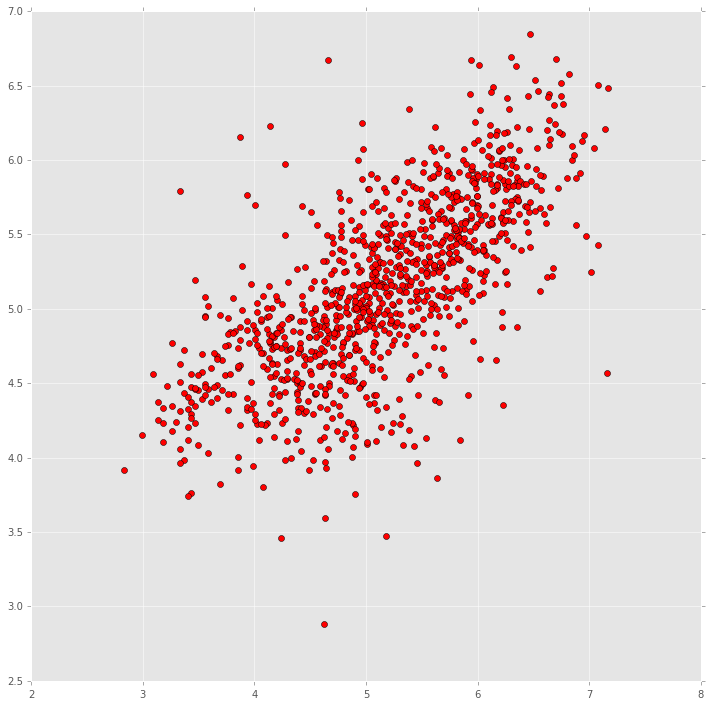

In [32]:
_ = plt.plot(y, model.predict(x), 'ro')